In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [3]:
data1=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2021.xlsx")
data2=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2020.xlsx")
data3=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2019.xlsx")
data4=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2018.xlsx")

In [4]:
data=pd.concat([data1,data2,data3,data4])
data=data.sort_values(by='DATE', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('DATE')

In [7]:
#data
data.head()

,Price
DATE,
2018-10-12,31876
2018-10-15,32264
2018-10-16,32109
2018-10-17,32043
2018-10-18,32037


## Seasonal Naive Model

In [84]:
from sklearn.model_selection import train_test_split

In [8]:
# separate out a validation dataset
split_point = len(data)-152
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 606, Validation 152


In [11]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate a persistence model
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True,)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [12]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=43076.000, Expected=42729.000
>Predicted=42729.000, Expected=42429.000
>Predicted=42429.000, Expected=42024.000
>Predicted=42024.000, Expected=42376.000
>Predicted=42376.000, Expected=42585.000
>Predicted=42585.000, Expected=42613.000
>Predicted=42613.000, Expected=42416.000
>Predicted=42416.000, Expected=42351.000
>Predicted=42351.000, Expected=42598.000
>Predicted=42598.000, Expected=42590.000
>Predicted=42590.000, Expected=42712.000
>Predicted=42712.000, Expected=42933.000
>Predicted=42933.000, Expected=43438.000
>Predicted=43438.000, Expected=43515.000
>Predicted=43515.000, Expected=43508.000
>Predicted=43508.000, Expected=45377.000
>Predicted=45377.000, Expected=44656.000
>Predicted=44656.000, Expected=44449.000
>Predicted=44449.000, Expected=44408.000
>Predicted=44408.000, Expected=44200.000
>Predicted=44200.000, Expected=43982.000
>Predicted=43982.000, Expected=44025.000
>Predicted=44025.000, Expected=45034.000
>Predicted=45034.000, Expected=45140.000
>Predicted=45140

### Time series decomposition

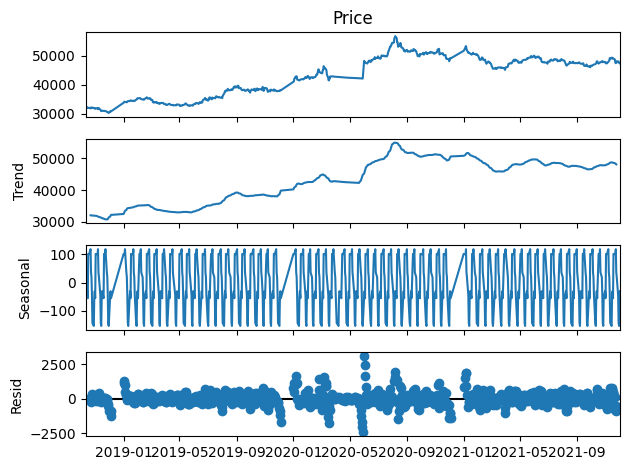

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Price,period=12)
decompose_ts_add.plot()
plt.show()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(17,12), 'figure.dpi':120})

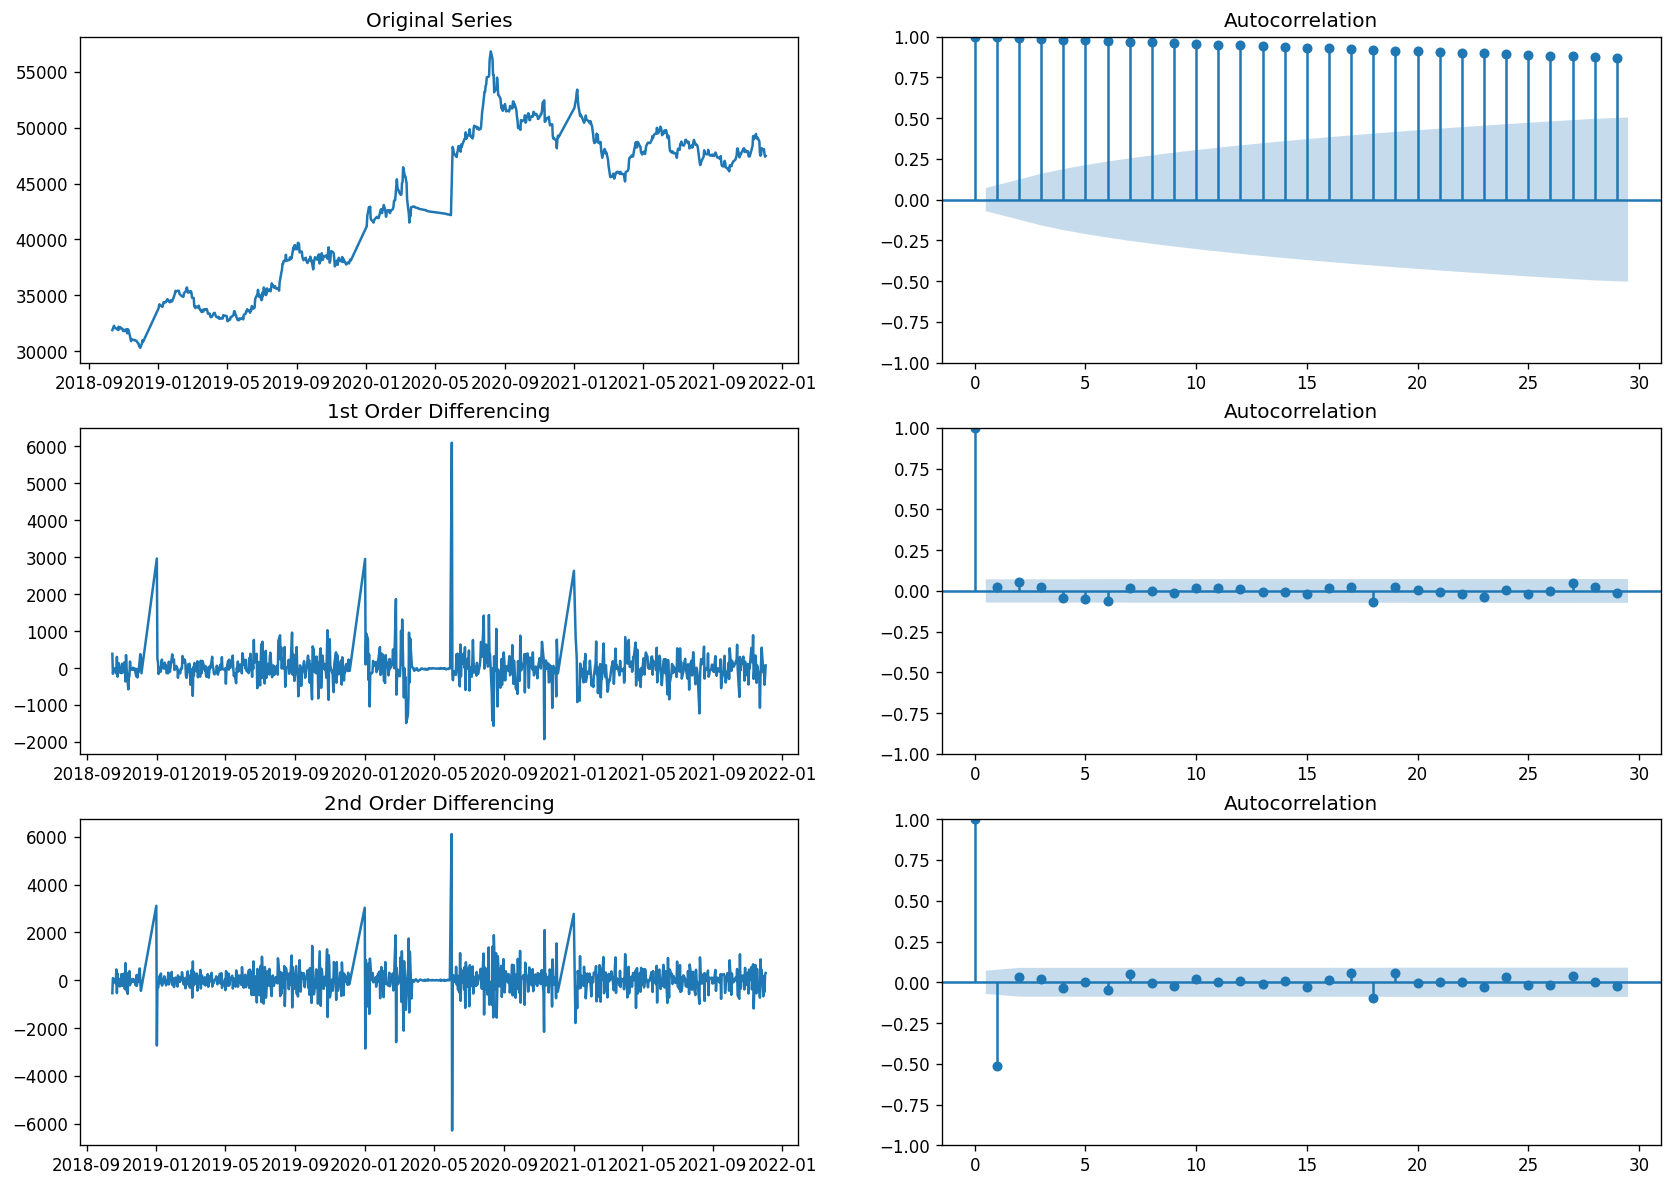

In [16]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(data.Price); axes[0, 0].set_title('Original Series')
plot_acf(data.Price, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Price.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.Price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Price.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [18]:
#check number of difference required for a stationary series

#from pmdarima.arima.utils import ndiffs
#y = data.Price
## Adf Test
#print('ADF :', ndiffs(y, test='adf') )
# KPSS test
#print('KPSS :' ,ndiffs(y, test='kpss'))
# PP test:
#print('PP :' ,ndiffs(y, test='pp'))


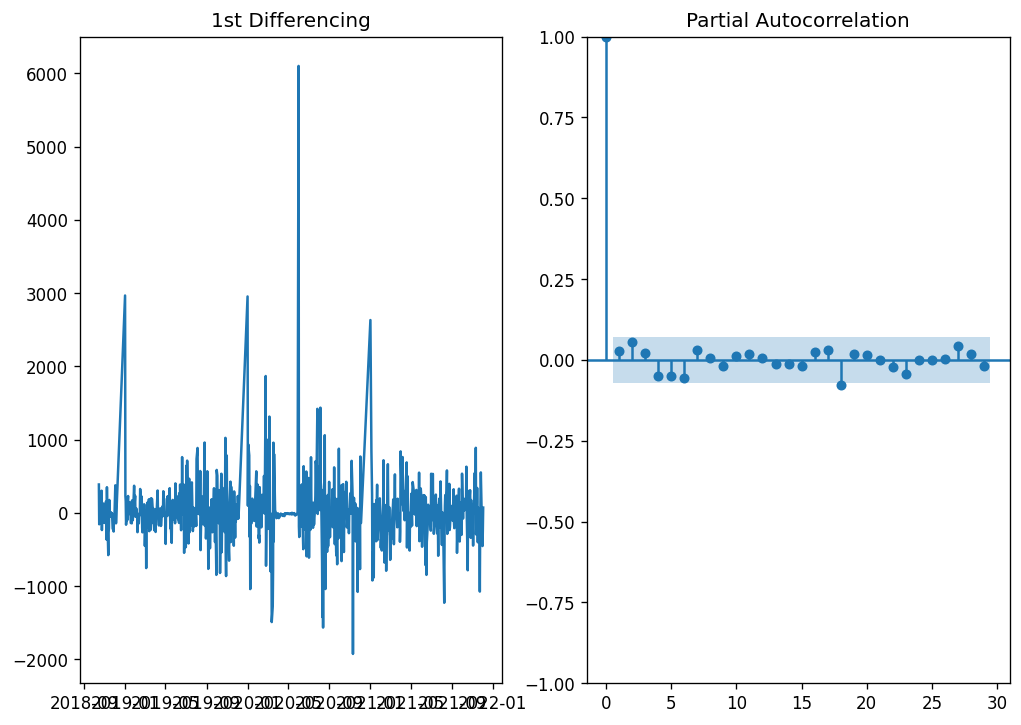

In [21]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(data.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Price.diff().dropna(), ax=axes[1])

plt.show()

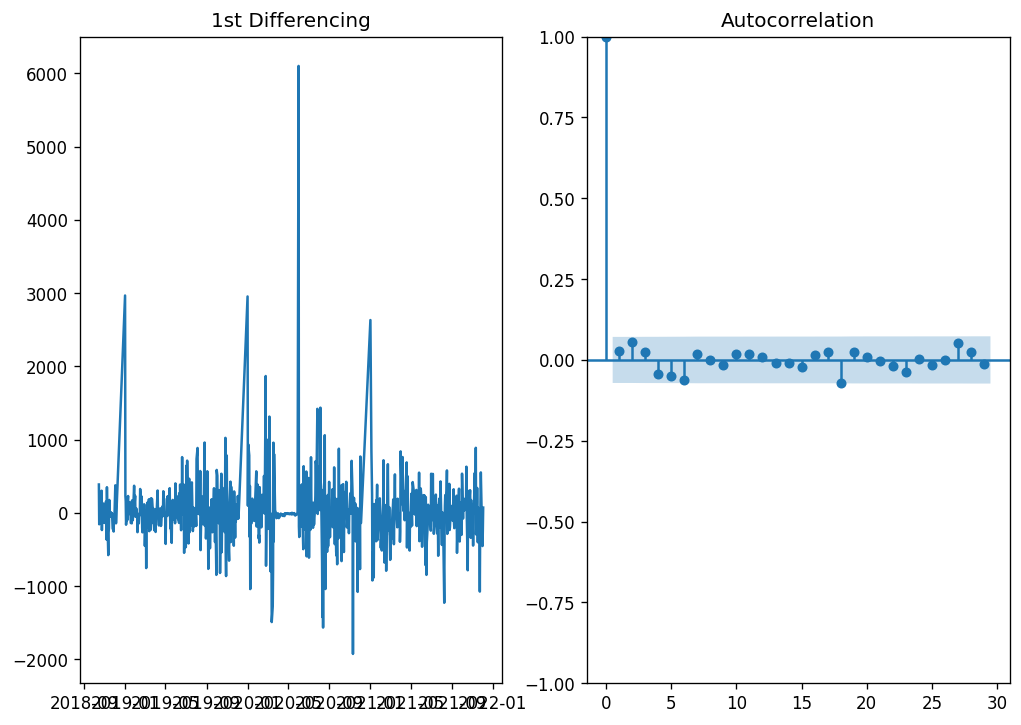

In [25]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(data.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data.Price.diff().dropna(), ax=axes[1])

plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
# separate out a validation dataset
split_point = len(data)-152
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 606, Validation 152


### ARIMA

In [28]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [32]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=152)
#model_fit.plot_predict(1,758)
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  605
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4596.899
Date:                Mon, 29 Sep 2025   AIC                           9195.799
Time:                        21:25:53   BIC                           9200.202
Sample:                             0   HQIC                          9197.512
                                - 605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.385e+05   2810.977     84.834      0.000    2.33e+05    2.44e+05
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):             52404.41
Prob(Q):                              0.60   Pr

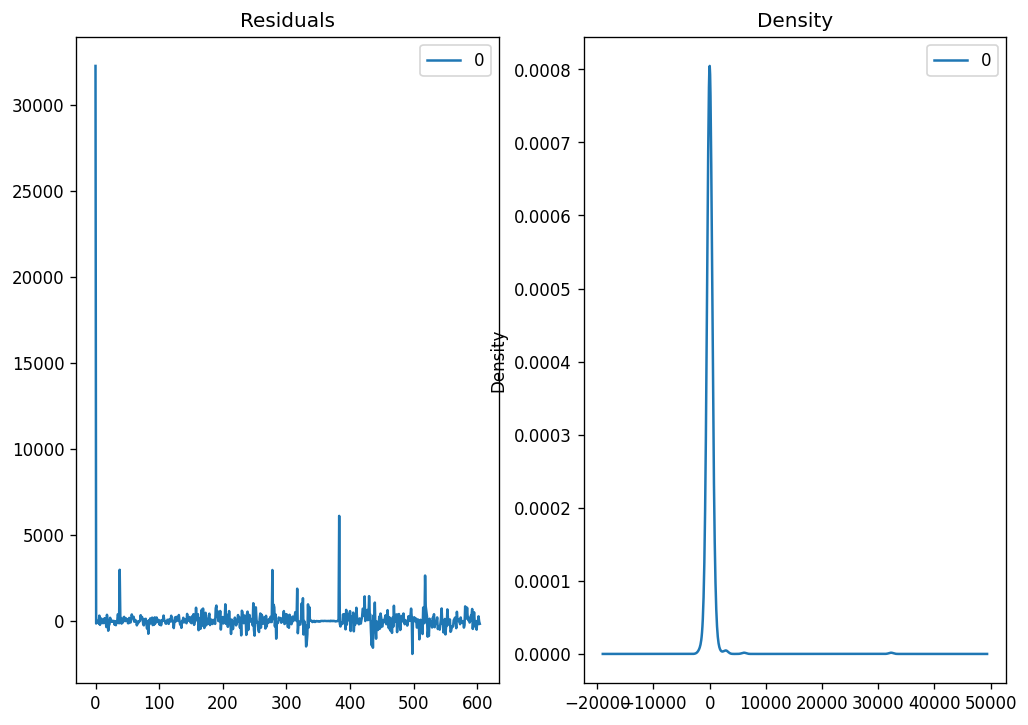

In [33]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

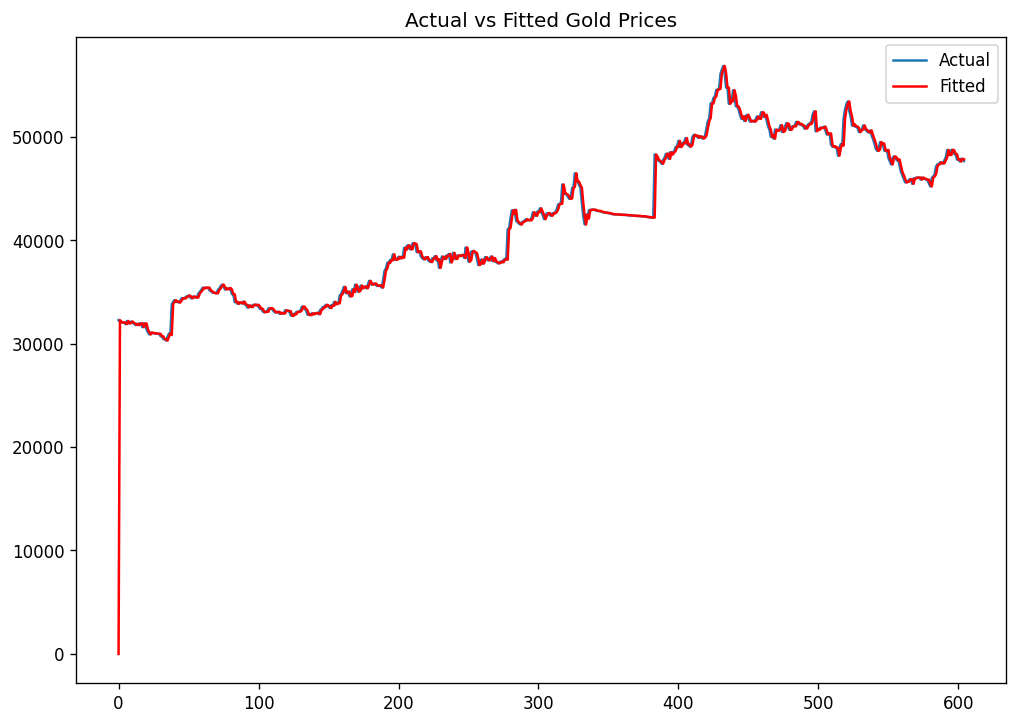

In [35]:
import matplotlib.pyplot as plt

# Actual values
plt.plot(X, label='Actual')

# Fitted values (in-sample predictions)
plt.plot(model_fit.fittedvalues, label='Fitted', color='red')

plt.title('Actual vs Fitted Gold Prices')
plt.legend()
plt.show()

In [36]:

# Load the validation dataset
validation_data = pd.read_csv('validation.csv', header=None)

# Extract actual values from the second column (index 1)
actual_values = validation_data[1]

# Compute RMSE between actual values and forecasted values
rmse = sqrt(mean_squared_error(actual_values, forecast))

# Display the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1003.75


In [37]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.Price[:558].astype('float32')
test = data.Price[558:].astype('float32')

C:\Users\jeyaagastin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jeyaagastin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jeyaagastin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

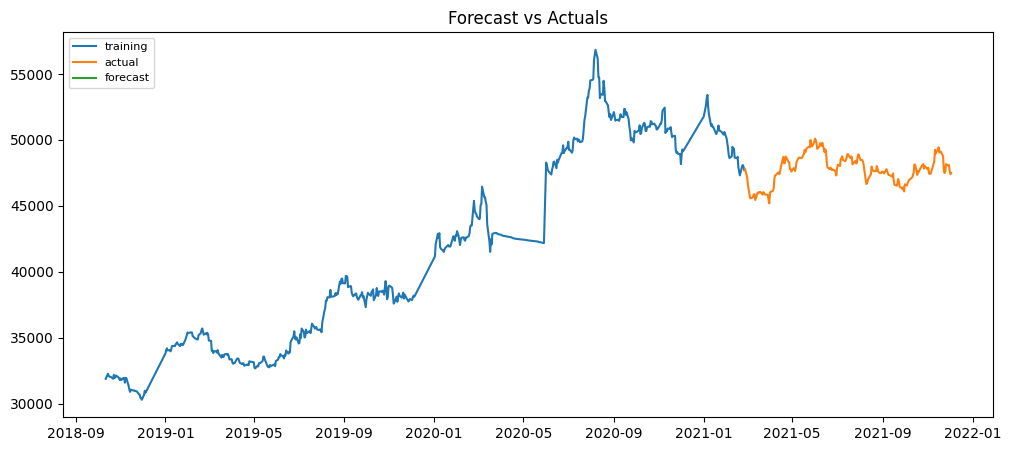

In [39]:
# Build Model
model = ARIMA(train, order=(0, 1, 0))  
fitted = model.fit()  

# Forecast the next 200 steps
forecast = fitted.get_forecast(steps=200)

# Extract predicted mean and confidence intervals
fc_series = forecast.predicted_mean
conf_int = forecast.conf_int()

# Convert to pandas Series for plotting
fc_series = pd.Series(fc_series, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [41]:
import numpy as np
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    # Ensure inputs are NumPy arrays
    forecast = np.array(forecast)
    actual = np.array(actual)

    # Core metrics
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual)) * 100  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)                                   # Mean Error
    mae = np.mean(np.abs(forecast - actual))                          # Mean Absolute Error
    mpe = np.mean((forecast - actual) / actual) * 100                 # Mean Percentage Error
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))                 # Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0, 1]                        # Correlation Coefficient

    # Min-Max Accuracy
    mins = np.minimum(forecast, actual)
    maxs = np.maximum(forecast, actual)
    minmax = 1 - np.mean(mins / maxs)

    # First-lag autocorrelation of residuals
    residuals = forecast - actual
    acf1 = acf(residuals, nlags=1)[1] * 100

    # Return all metrics in a dictionary
    return {
        'MAPE (%)': round(mape, 2),
        'ME': round(me, 2),
        'MAE': round(mae, 2),
        'MPE (%)': round(mpe, 2),
        'RMSE': round(rmse, 2),
        'ACF1 (%)': round(acf1, 2),
        'Correlation': round(corr, 2),
        'Min-Max Accuracy': round(minmax, 2)
    }

# Example usage
metrics = forecast_accuracy(fc_series, test.values)
for metric, value in metrics.items():
    print(f"{metric}: {value}")
    

MAPE (%): nan
ME: nan
MAE: nan
MPE (%): nan
RMSE: nan
ACF1 (%): nan
Correlation: nan
Min-Max Accuracy: nan


In [42]:
import pmdarima as pm

model = pm.auto_arima(data.Price, start_p=1, start_q=1,
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

ModuleNotFoundError: No module named 'pmdarima'

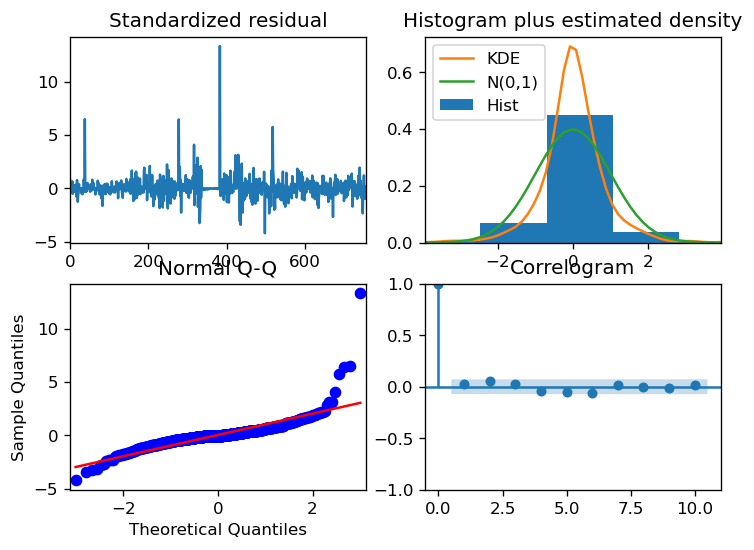

In [457]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

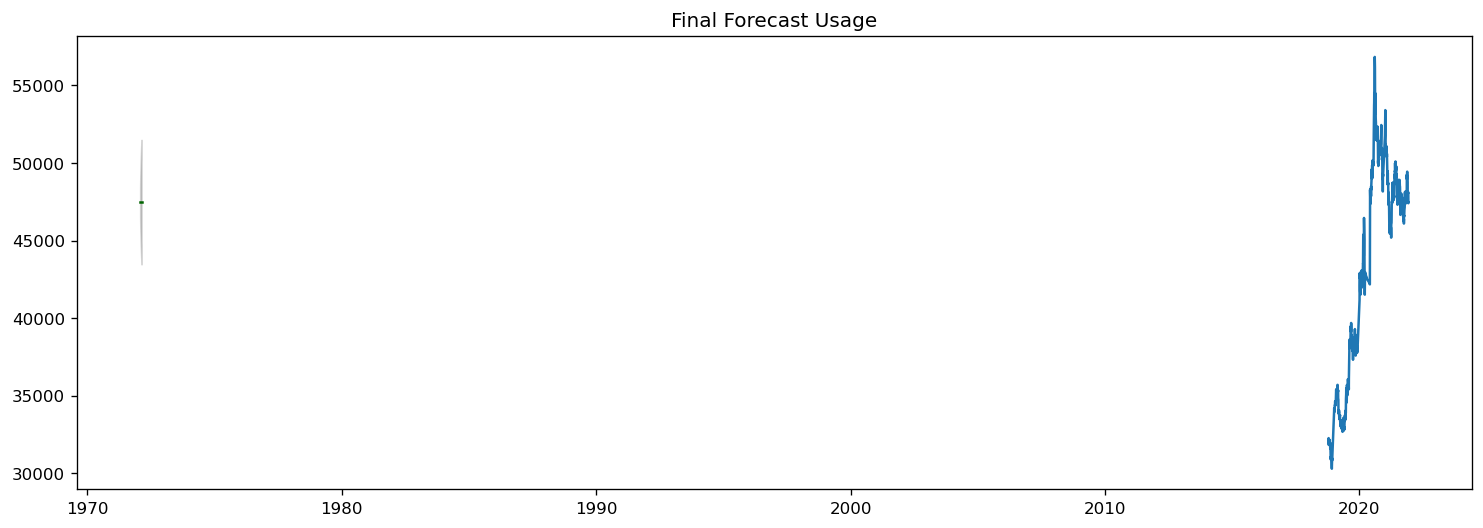

In [458]:
# Forecast
n_periods = 20
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.Price), len(data.Price)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.Price,)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast Usage")
plt.show()


### SARIMA

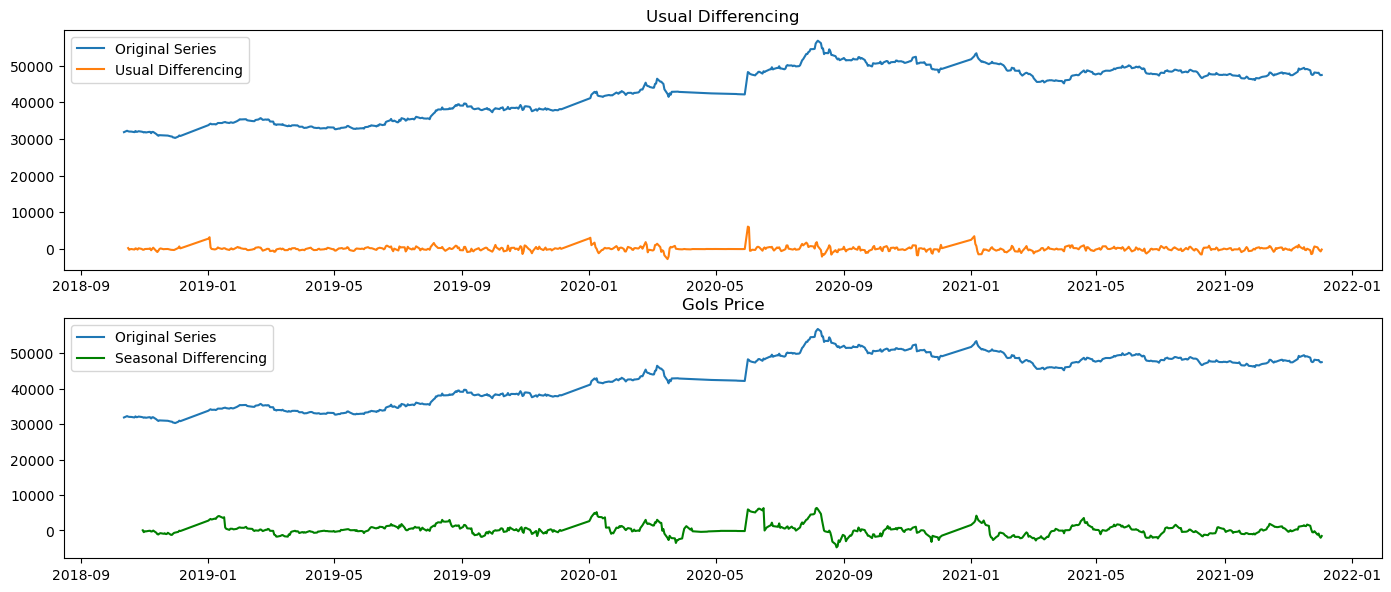

In [414]:

# Plot
fig, axes = plt.subplots(2, 1, figsize=(17,7), dpi=100)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(2), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Gols Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [415]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=12071.411, Time=8.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13135.622, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=12099.122, Time=5.96 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=12534.239, Time=4.97 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=13152.612, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=12240.975, Time=3.01 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=12068.104, Time=2.75 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=12080.408, Time=7.61 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=12069.976, Time=19.14 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=12062.266, Time=29.44 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=12060.281, Time=16.62 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=12534.450, Time=14.43 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=12073.703, Time=27.80 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=12062.282, Time=30.54 sec

KeyboardInterrupt: 

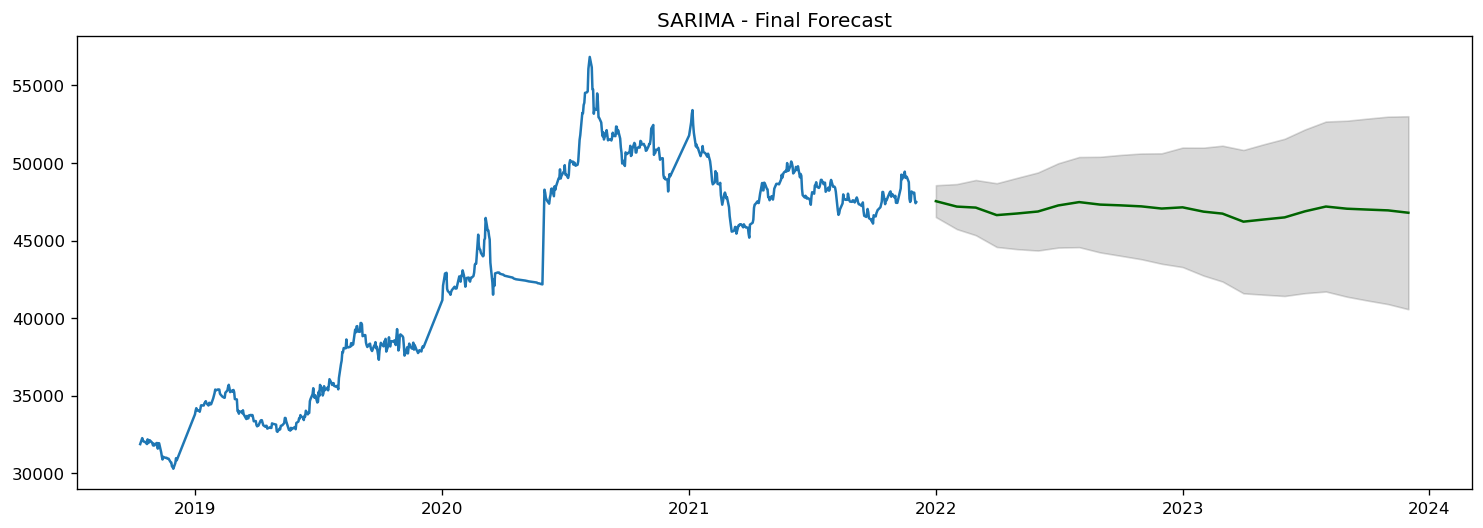

In [313]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()